In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [21]:
df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [22]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


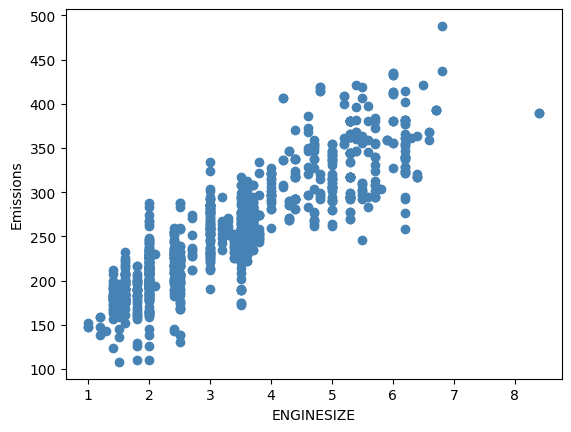

In [23]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [24]:
#Train/test split Method 

from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2)

In polynomial regression, the relationship between the 
- independent variable =x and 
- dependent variable =y  
is modeled as nth degree polynomial in x .

2nd degree : y = ß0 + (ß1*X1) + ß2*X2²

   - For example, the original feature set has only one feature : **ENGINESIZE**
   - If we select the degree of the polynomial to be 2 :
      - It generates 3 features : degree=0, degree=1,degree=2   --> Coefficients. ß,ß1,ß2

In [25]:
from sklearn.preprocessing import PolynomialFeatures


train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)

In [26]:
train_x_poly=poly.fit_transform(train_x) #Transform to polynomial
print(train_x_poly)

[[ 1.    3.8  14.44]
 [ 1.    5.3  28.09]
 [ 1.    5.3  28.09]
 ...
 [ 1.    2.4   5.76]
 [ 1.    3.    9.  ]
 [ 1.    3.    9.  ]]



y = ß0 + (ß1*X1) + ß2*X2²

- Transformed data looks like feature sets of multiple linear regression analysis.
- Polynomial regression is a special case of linear regression, with selection your features .

**Model**

In [27]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [28]:
train_y_=clf.fit(train_x_poly,train_y)

#The coefficients
print("Coefficients:",clf.coef_)
print("Intercept:",clf.intercept_)

Coefficients: [[ 0.         52.4916557  -1.81506918]]
Intercept: [104.15153437]


**Plot**

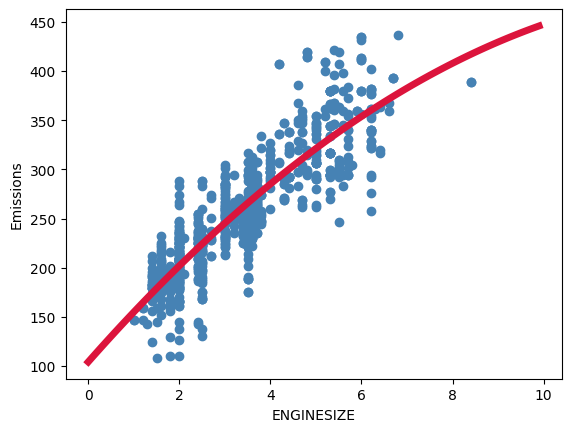

In [29]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="steelblue")
xx=np.arange(0.0,10.0,0.1)#Curve arttırarak plotta görselleştirmede kullanılır. 0-10 arasında x ekseni, 01,0.1 artar
yy=clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)
#y = ß0 + (ß1*X1) + ß2*X2²

plt.plot(xx,yy,"crimson",linewidth=5)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()


In [30]:
print(f"x line value:",xx)
print(f"y line value: ",yy)

x line value: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
y line value:  [104.15153437 109.38254925 114.57726274 119.73567485 124.85778558
 129.94359493 134.99310289 140.00630946 144.98321466 149.92381847
 154.82812089 159.69612194 164.5278216  169.32321987 174.08231676
 178.80511227 183.4916064  188.14179914 192.7556905  197.33328047
 201.87456906 206.37955627 210.84824209 215.28062653 219.67670959
 224.03649126 228.35997155 232.64715046 236.89802798 241.11260412
 245.29087888 249.43285225 253.53852424 257.60789484 261.64096407
 265.6377319  269.59819836 273.52236343 277.41022712 281.26178942
 285.07705034 288.85600988 292.59866

#### Evaluation 
- Mean Absolute Error (MAE)
- Mean Squarred  Error(MSE)
- R2 - Score 

1) test_y_ and test_y

In [32]:
test_x_poly=poly.transform(test_x)
test_y_=clf.predict(test_x_poly)

In [33]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# mae=mean_absolute_error(expected,predicted)
mae=mean_absolute_error(test_y_,test_y)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 22.396404028876972


In [35]:
# Mean Squarred  Error(MSE) 
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


Residual sum of squares (MSE): 876.53


In [36]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

R2-score: 0.78
